<a href="https://colab.research.google.com/github/MFRoz1/Predict-Oil-Price-With-ARIMA-Models/blob/main/Oil_TIme_Series_Mohammad_Fathur_Rozi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [ ]:
!pip install  pmdarima statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
data = pd.read_csv('oil.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

kolom date dijadikan sebagai indeks supaya memungkinkan akses data dengan lebih efisien. Selain itu, pengaturan indeks juga memungkinkan untuk melakukan operasi seperti pengurutan, pengelompokan, dan penggabungan data dengan lebih mudah dan efisien.

In [ ]:
data

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


Karena kolom date dijadikan sebagai index maka disini hanya akan teridentifikasi 1 kolom yaitu 'dcoilwtico' yang berisikan harga minyak. Data terdiri dari 1218 baris dan 1 kolom.

In [ ]:
data.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [ ]:
# cek ukuran data awal
data.shape

(1218, 1)

In [ ]:
# Cek jumlah baris kosong
data.isna().sum()

dcoilwtico    43
dtype: int64

Terdapat 43 baris yang kosong

In [ ]:
# Cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


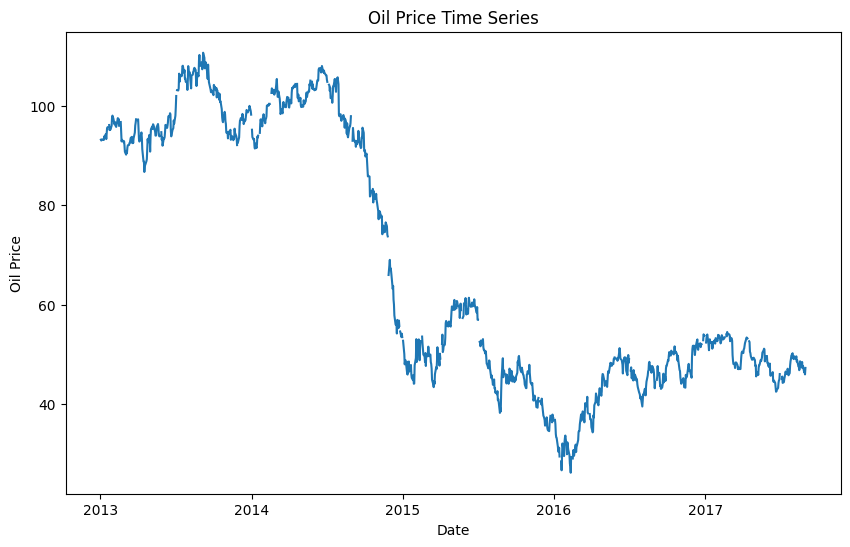

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Time Series')
plt.show()

Dapat dilihat dalam grafik bahwa terdapat potongan dan tidak seutuhnya menyambung

In [ ]:
data.dropna(subset=['dcoilwtico'], inplace=True)

Karena data berjumlah banyak, akan kita hapus untuk data yang kosong

In [ ]:
# Cek ukuran data setelah dihapus
data.shape

(1175, 1)

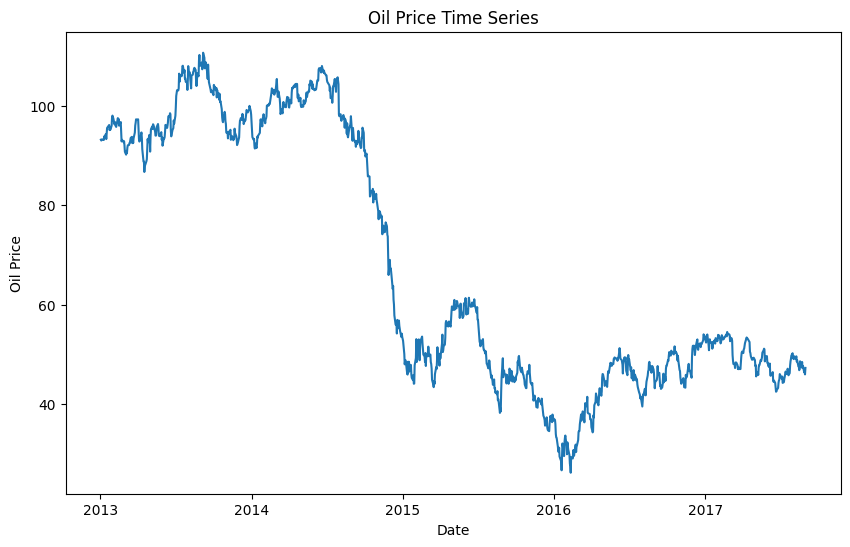

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Time Series')
plt.show()

Didapatkan hasil bahwa sudah tidak terdapat nilai kosong sehingga grafik tidak terlihat putus

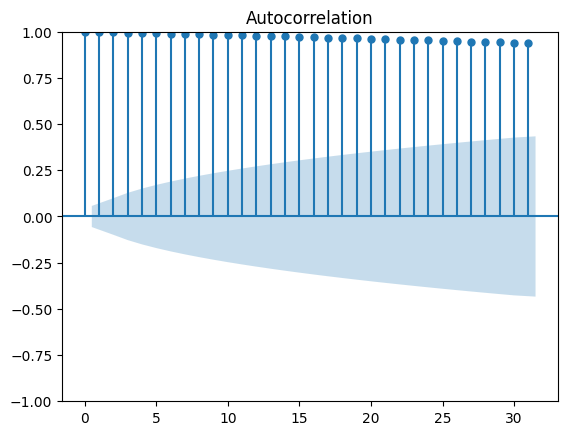

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


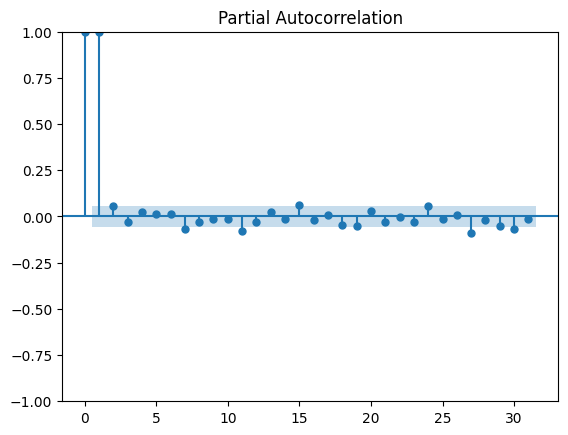

In [ ]:
# Cek ACF dan PACF dengan plot grafik
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

plot_pacf(data)
plt.show()

# Diferencing

In [ ]:
# Pengecekan stasioneritas data
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

adf_test(data['dcoilwtico'])

ADF Statistic: -0.877178
p-value: 0.795395


Karena p-value > 0.05 maka data termasuk tidak stasioner

In [ ]:
data_diff = data.diff().dropna()
adf_test(data_diff['dcoilwtico'])

ADF Statistic: -36.396148
p-value: 0.000000


ADF (Augmented Dickey-Fuller) Statistic adalah salah satu metode untuk menguji keberadaan unit root dalam suatu time series. Unit root adalah karakteristik dari time series yang menyebabkan data memiliki tren dan tidak stabil secara statistik. Jika time series memiliki unit root, maka data tersebut tidak stasioner dan tidak cocok untuk dianalisis menggunakan model ARIMA.
Hasil ADF Statistic yang negatif menunjukkan bahwa time series tersebut stasioner. Semakin negatif nilai ADF Statistic, semakin kuat bukti bahwa time series tersebut stasioner. Dalam kasus ini, nilai ADF Statistic sebesar -36.396148 menunjukkan bahwa time series tersebut sangat stasioner dan cocok untuk dianalisis menggunakan model ARIMA.
Dalam konteks yang lebih spesifik, nilai ADF Statistic yang negatif dan sangat kecil menunjukkan bahwa time series harga minyak mentah yang digunakan dalam contoh tersebut tidak memiliki unit root dan tidak memiliki tren yang signifikan. Oleh karena itu, data tersebut stasioner dan dapat dianalisis menggunakan model ARIMA.

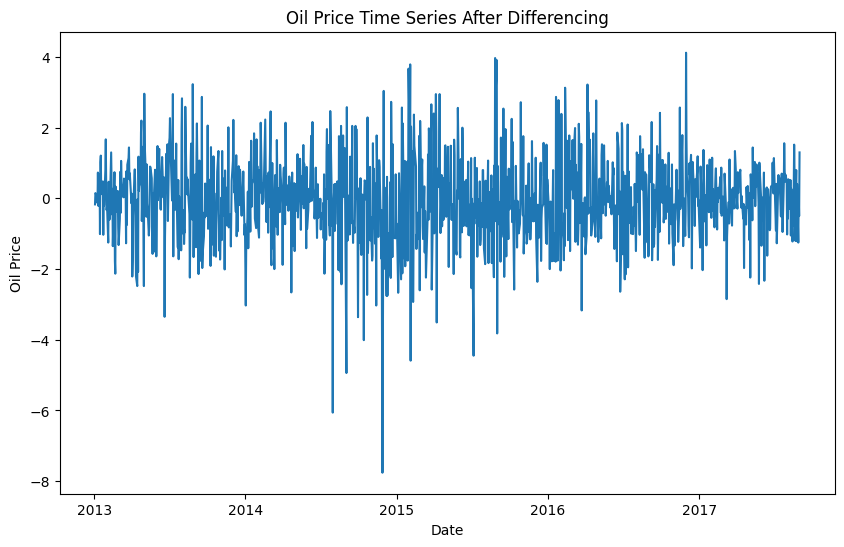

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_diff)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Time Series After Differencing')
plt.show()

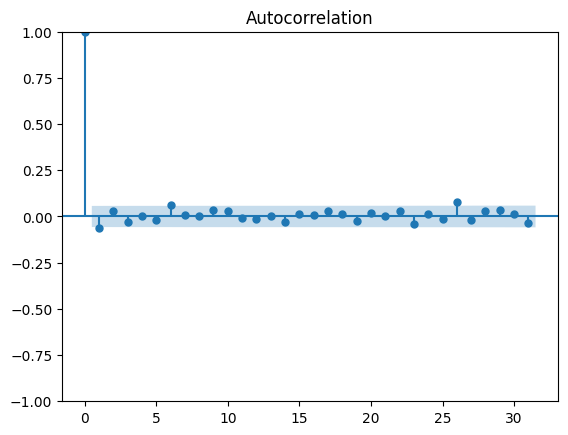

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


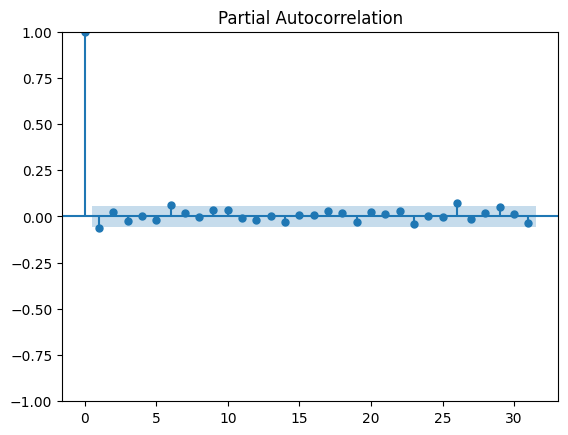

In [ ]:
# Cek ACF dan PACF setelah Diferencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff)
plt.show()

plot_pacf(data_diff)
plt.show()

Terdapat perubahan baik pada grafik, plot acf dan plot acf setelah di differencing

# Modelling

In [ ]:
# Train test split
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

## Arima

### Model 1 (1,1,1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima_model1 = ARIMA(train_data, order=(1, 1, 1))
arima_result1 = arima_model1.fit()
print(arima_result1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             dcoilwtico   No. Observations:                  940
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1572.837
Date:                Fri, 02 Jun 2023   AIC                           3151.675
Time:                        11:22:14   BIC                           3166.209
Sample:                             0   HQIC                          3157.216
                                - 940                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7183      0.191     -3.770      0.000      -1.092      -0.345
ma.L1          0.6593      0.205      3.221      0.001       0.258       1.060
sigma2         1.6688      0.055     30.440      0.0

In [ ]:
#forecast
arima_forecast1 = arima_result1.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Model 2 (2,1,1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima_model2 = ARIMA(train_data, order=(2, 1, 1))
arima_result2 = arima_model2.fit()
print(arima_result2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             dcoilwtico   No. Observations:                  940
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1572.761
Date:                Fri, 02 Jun 2023   AIC                           3153.523
Time:                        11:22:16   BIC                           3172.902
Sample:                             0   HQIC                          3160.911
                                - 940                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7930      0.295     -2.688      0.007      -1.371      -0.215
ar.L2         -0.0170      0.045     -0.378      0.706      -0.105       0.071
ma.L1          0.7271      0.294      2.473      0.0

In [ ]:
#forecast
arima_forecast2 = arima_result2.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Model 3 (1,1,2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima_model3 = ARIMA(train_data, order=(1, 1, 2))
arima_result3 = arima_model1.fit()
print(arima_result3.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             dcoilwtico   No. Observations:                  940
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1572.837
Date:                Fri, 02 Jun 2023   AIC                           3151.675
Time:                        11:22:16   BIC                           3166.209
Sample:                             0   HQIC                          3157.216
                                - 940                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7183      0.191     -3.770      0.000      -1.092      -0.345
ma.L1          0.6593      0.205      3.221      0.001       0.258       1.060
sigma2         1.6688      0.055     30.440      0.0

In [ ]:
#forecast
arima_forecast3 = arima_result3.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Model 4 (2,1,2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima_model4 = ARIMA(train_data, order=(2, 1, 2))
arima_result4 = arima_model1.fit()
print(arima_result4.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             dcoilwtico   No. Observations:                  940
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1572.837
Date:                Fri, 02 Jun 2023   AIC                           3151.675
Time:                        11:22:16   BIC                           3166.209
Sample:                             0   HQIC                          3157.216
                                - 940                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7183      0.191     -3.770      0.000      -1.092      -0.345
ma.L1          0.6593      0.205      3.221      0.001       0.258       1.060
sigma2         1.6688      0.055     30.440      0.0

In [ ]:
#forecast
arima_forecast4 = arima_result4.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Auto Arima


In [ ]:
from pmdarima import auto_arima
auto_arima_model = auto_arima(train_data, seasonal=False, stepwise=True,
                               suppress_warnings=True,
                               error_action="ignore",
                               trace=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3155.787, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3154.894, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3152.062, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3152.322, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3154.403, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3153.335, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3152.049, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3153.072, Time=1.92 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3153.850, Time=1.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3153.541, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3151.675, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3152.056, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3151.792, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3153.523, Time=0.96 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [ ]:
#forecast
auto_arima_forecast = auto_arima_model.predict(n_periods=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Evaluasi Model


### Model ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluate_forecast(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

arima_mse1, arima_mae1, arima_rmse1 = evaluate_forecast(test_data, arima_forecast1)
arima_mse2, arima_mae2, arima_rmse2 = evaluate_forecast(test_data, arima_forecast2)
arima_mse3, arima_mae3, arima_rmse3 = evaluate_forecast(test_data, arima_forecast3)
arima_mse4, arima_mae4, arima_rmse4 = evaluate_forecast(test_data, arima_forecast4)

print("ARIMA Model 1 (1,1,1) Metrics:")
print(f"MSE: {arima_mse1}, MAE: {arima_mae1}, RMSE: {arima_rmse1}")

print("\nARIMA Model 2 (2,1,1) Metrics:")
print(f"MSE: {arima_mse2}, MAE: {arima_mae2}, RMSE: {arima_rmse2}")

print("\nARIMA Model 3 (1,1,2) Metrics:")
print(f"MSE: {arima_mse3}, MAE: {arima_mae3}, RMSE: {arima_rmse3}")

print("\nARIMA Model 4 (2,1,2) Metrics:")
print(f"MSE: {arima_mse4}, MAE: {arima_mae4}, RMSE: {arima_rmse4}")

ARIMA Model 1 (1,1,1) Metrics:
MSE: 31.32890982638902, MAE: 4.825128763186511, RMSE: 5.597223403294621

ARIMA Model 2 (2,1,1) Metrics:
MSE: 31.142337881646032, MAE: 4.80741186389576, RMSE: 5.58053204288319

ARIMA Model 3 (1,1,2) Metrics:
MSE: 31.32890982638902, MAE: 4.825128763186511, RMSE: 5.597223403294621

ARIMA Model 4 (2,1,2) Metrics:
MSE: 31.32890982638902, MAE: 4.825128763186511, RMSE: 5.597223403294621


### Model Auto ARIMA

In [ ]:
auto_arima_mse, auto_arima_mae, auto_arima_rmse = evaluate_forecast(test_data, auto_arima_forecast)

print("AUTO ARIMA Model Metrics:")
print(f"MSE: {auto_arima_mse}, MAE: {auto_arima_mae}, RMSE: {auto_arima_rmse}")

AUTO ARIMA Model Metrics:
MSE: 31.32890982638902, MAE: 4.825128763186511, RMSE: 5.597223403294621


### Perbandingan plot  Model ARIMA (2,1,1) VS Auto ARIMA

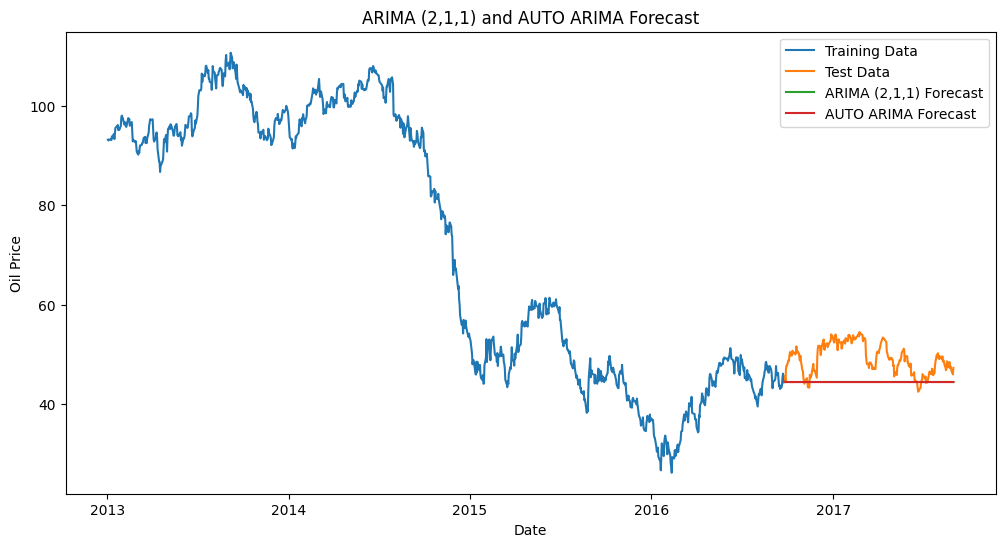

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, arima_forecast2, label='ARIMA (2,1,1) Forecast')
plt.plot(test_data.index, auto_arima_forecast, label='AUTO ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('ARIMA (2,1,1) and AUTO ARIMA Forecast')
plt.legend()
plt.show()

Pada model ARIMA diatas sengaja untuk dibedakan dengan best subset dari AUTO ARIMA sehingga bisa dilihat perbedaan dari forecasting maupun akurasi keduanya.
